In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 당뇨병 데이터 읽어오기
data_path = os.path.join("..", "data", "diabetes.csv")
data = np.loadtxt(data_path, delimiter=",", dtype = np.float32)
x_data = data[:, 0:-1]
y_data = data[:, [-1]]

In [3]:
W = tf.Variable(tf.random.normal([8, 1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

In [4]:
# Hypothesis
def hypothesis(W, b):
    return tf.sigmoid(tf.matmul(x_data, W) + b)

In [5]:
def cost(W, b):
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(W, b)) + (1 - y_data) * tf.math.log(1 - hypothesis(W, b)))

In [6]:
def graph():
    import matplotlib as mpl
    mpl.rc('font', family = 'Malgun Gothic')
    mpl.rc('axes', unicode_minus = False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("학습 횟수에 따른 오차(cost)와 accuracy 변화")
    ax0.plot(cost_arr, 'r-', label = "y0")
    ax0.set_ylabel("y0")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label = "y1")
    ax1.set_ylabel("y1")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

In [7]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [8]:
epoch_arr = []
cost_arr = []
accuracy_arr = []

In [10]:
for step in range(10001):
    with tf.GradientTape() as tape:
        cost_value = cost(W, b)
    gradients = tape.gradient(cost_value, [W, b])
    opt.apply_gradients(zip(gradients, [W, b]))
    predicted = tf.cast(hypothesis(W, b) > 0.5, dtype = tf.float64)
    epoch_arr.append(step)
    cost_arr.append(cost_value.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)

    if step % 500 == 0:
        print("epochs = %d, cost = %.8f, W1 = %.8f, W2 = %.8f, ... b = %.8f, accuracy = %.8f" % (step, cost_value, W.numpy()[0, 0], W.numpy()[1, 0], b.numpy()[0], accuracy))

epochs = 0, cost = 0.91411644, W1 = 0.73429555, W2 = 0.69489396, ... b = 0.02792449, accuracy = 0.33596838
epochs = 500, cost = 0.72920996, W1 = 0.31871870, W2 = 0.31731167, ... b = 0.30090854, accuracy = 0.57444005
epochs = 1000, cost = 0.66990274, W1 = 0.11075343, W2 = -0.07106399, ... b = 0.24177313, accuracy = 0.61660079
epochs = 1500, cost = 0.62638843, W1 = -0.04972815, W2 = -0.41304812, ... b = 0.17453827, accuracy = 0.64163373
epochs = 2000, cost = 0.59399152, W1 = -0.18126144, W2 = -0.70945686, ... b = 0.12358669, accuracy = 0.66271410
epochs = 2500, cost = 0.56967586, W1 = -0.28966230, W2 = -0.96668363, ... b = 0.08685057, accuracy = 0.69038208
epochs = 3000, cost = 0.55120224, W1 = -0.37917104, W2 = -1.19106209, ... b = 0.06073216, accuracy = 0.71805007
epochs = 3500, cost = 0.53696764, W1 = -0.45333573, W2 = -1.38804924, ... b = 0.04238589, accuracy = 0.72859025
epochs = 4000, cost = 0.52583963, W1 = -0.51507831, W2 = -1.56214654, ... b = 0.02972618, accuracy = 0.74308300
e

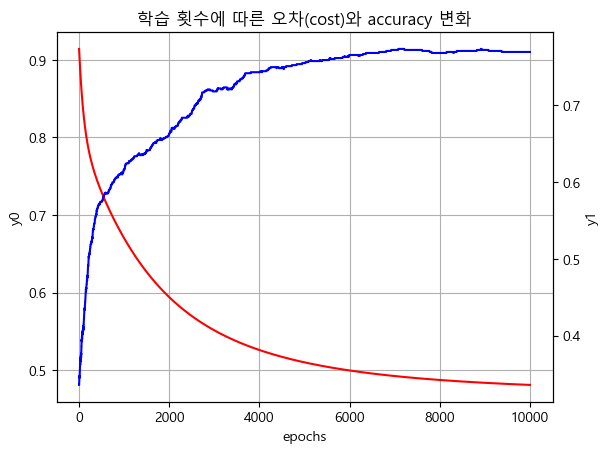

In [11]:
graph()

In [12]:
print("===================================")
print("W = ", W.numpy())
print("b = ", b.numpy()[0])
print("y_data = ", y_data)
print("sigmoid = ", hypothesis(W, b).numpy())

predicted = tf.cast(hypothesis(W, b) > 0.5, dtype = tf.float64)
accuracy = np.mean(y_data == predicted)

print("Accuracy = ", accuracy)

W =  [[-0.8153523 ]
 [-2.7093363 ]
 [ 0.8457769 ]
 [-0.08272532]
 [-0.57859176]
 [-2.1018252 ]
 [-0.6472588 ]
 [-0.32082364]]
b =  0.025812902
y_data =  [[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 